# More relevant data selection for us

In [1]:
import pandas as pd

df = pd.read_csv("/home/itsquall/Descargas/Moriarty2.csv",
                  usecols=["UUID","ActionType"])

df['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df['UUID'] = df['UUID'].dt.round('ms')

df2 = pd.read_csv("/home/itsquall/Descargas/T4.csv",
                 usecols=["UUID", "CPU_0", "CPU_1", "CPU_2", "CPU_3", "Traffic_TotalRxBytes", 
                          "Traffic_TotalTxBytes", "tot_user", "tot_system", "processes", "MemFree",
                          "SwapFree"])

df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('ms')

data = pd.merge(df,df2, on=['UUID'])
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
y = data['ActionType']

data = data.drop('UUID', 1)
data = data.drop('ActionType', 1)
data


,CPU_0,CPU_1,CPU_2,CPU_3,Traffic_TotalRxBytes,Traffic_TotalTxBytes,MemFree,SwapFree,tot_user,tot_system,processes
0,45.833336,52.380955,80.000000,61.904762,0.0,40.0,61348.0,1452.0,26675282.0,18705855.0,8384093.0
1,95.238100,5.000000,100.000000,21.052631,0.0,735.0,60728.0,1544.0,26676310.0,18706225.0,8384207.0
2,72.727270,7.692308,78.947370,4.761905,5901.0,2809.0,69268.0,296.0,26677521.0,18706955.0,8384543.0
3,5.000000,4.761905,4.761905,4.545454,0.0,0.0,77116.0,468.0,26677826.0,18707208.0,8384623.0
4,21.739130,0.000000,21.739130,5.000000,1417.0,636.0,95928.0,0.0,26678262.0,18707518.0,8384755.0
5,9.523809,0.000000,0.000000,4.761905,0.0,0.0,108728.0,412.0,26678720.0,18707772.0,8384857.0
6,9.090909,0.000000,0.000000,0.000000,0.0,0.0,108620.0,412.0,26678985.0,18707937.0,8384939.0
7,0.000000,0.000000,4.761905,0.000000,208.0,0.0,111264.0,468.0,26679230.0,18708128.0,8385021.0
8,9.523809,0.000000,9.523809,15.000001,104.0,0.0,108372.0,456.0,26679542.0,18708334.0,8385133.0
9,5.000000,0.000000,0.000000,0.000000,52.0,83.0,108308.0,464.0,26680034.0,18708555.0,8385216.0


# Check correlation

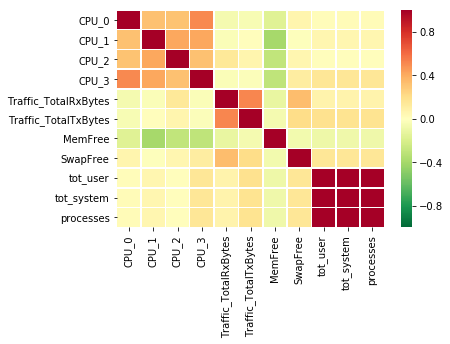

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

corr = data.corr(method='pearson')
sn.heatmap(corr, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, linewidths=0.5)


plt.show()

# Removing most correlated features

In [4]:
df2 = pd.read_csv("/home/itsquall/Descargas/T4.csv",
                 usecols=["UUID", "CPU_0", "CPU_1", "CPU_2", "CPU_3",
                          "Traffic_TotalTxBytes", "processes", "MemFree", "SwapFree"])

df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('ms')

data = pd.merge(df,df2, on=['UUID'])
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
y = data['ActionType']

data = data.drop('UUID', 1)
data = data.drop('ActionType', 1)
data

,CPU_0,CPU_1,CPU_2,CPU_3,Traffic_TotalTxBytes,MemFree,SwapFree,processes
0,45.833336,52.380955,80.000000,61.904762,40.0,61348.0,1452.0,8384093.0
1,95.238100,5.000000,100.000000,21.052631,735.0,60728.0,1544.0,8384207.0
2,72.727270,7.692308,78.947370,4.761905,2809.0,69268.0,296.0,8384543.0
3,5.000000,4.761905,4.761905,4.545454,0.0,77116.0,468.0,8384623.0
4,21.739130,0.000000,21.739130,5.000000,636.0,95928.0,0.0,8384755.0
5,9.523809,0.000000,0.000000,4.761905,0.0,108728.0,412.0,8384857.0
6,9.090909,0.000000,0.000000,0.000000,0.0,108620.0,412.0,8384939.0
7,0.000000,0.000000,4.761905,0.000000,0.0,111264.0,468.0,8385021.0
8,9.523809,0.000000,9.523809,15.000001,0.0,108372.0,456.0,8385133.0
9,5.000000,0.000000,0.000000,0.000000,83.0,108308.0,464.0,8385216.0


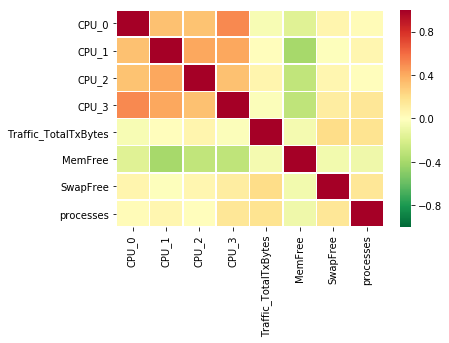

In [5]:
corr = data.corr(method='pearson')
sn.heatmap(corr, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, linewidths=0.5)


plt.show()

# Standarize the data to have same up and down limits

/home/itsquall/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


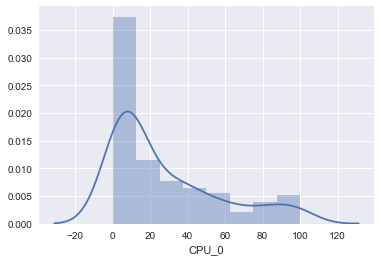

In [7]:
sn.set(color_codes=True)
sn.distplot(data['CPU_0']);


In [8]:
from sklearn import preprocessing

#min_max_scaler = preprocessing.MinMaxScaler()
#datanorm = pd.DataFrame(min_max_scaler.fit_transform(data.values), columns=data.columns, index=data.index)
#datanorm

scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(data)

/home/itsquall/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


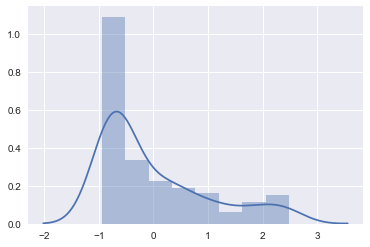

In [9]:
sn.distplot(datanorm[:,0])

# Split data on train data and test data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datanorm, y, test_size=0.3)

# Train model

In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Plot test data results

In [16]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
print("Error Measure", mae)

Error Measure 0.26785714285714285


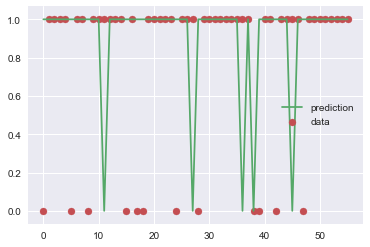

In [17]:
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()